<a href="https://colab.research.google.com/github/Priyansh295/Lab-Portal/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [ ]:
train = pd.read_csv("/content/sample_data/fashion-mnist_train.csv")
test = pd.read_csv("/content/sample_data/fashion-mnist_test.csv")


In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
class_labels= ["T-shirt/top","Trouser","Pullover" ,"Dress","Coat" ,"Sandal" ,"Shirt" ,"Sneaker" ,"Bag" ,"Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data = np.array(train, dtype= "float32")
test_data = np.array(test, dtype= "float32")

In [ ]:
x_train = train_data[:, 1:]
y_train = train_data[:, 0]

In [ ]:
x_test = test_data[:, 1:]
y_test = test_data[:, 0]

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

4.0


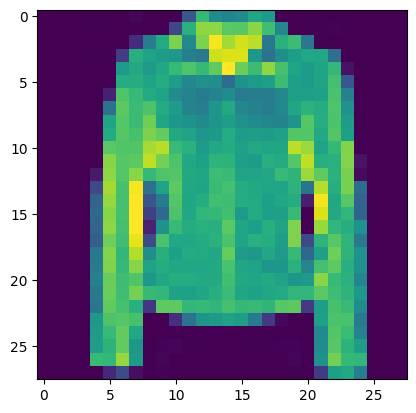

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1])
print(y_train[1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential([
    Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Use SparseCategoricalCrossentropy for multi-class classification
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(x_val, y_val))


Epoch 1/20
545/545 [==============================] - 11s 18ms/step - loss: nan - sparse_categorical_accuracy: 0.5116 - val_loss: nan - val_sparse_categorical_accuracy: 0.1056
Epoch 2/20
545/545 [==============================] - 8s 14ms/step - loss: nan - sparse_categorical_accuracy: 0.0990 - val_loss: nan - val_sparse_categorical_accuracy: 0.1056
Epoch 3/20
545/545 [==============================] - 9s 17ms/step - loss: nan - sparse_categorical_accuracy: 0.0990 - val_loss: nan - val_sparse_categorical_accuracy: 0.1056
Epoch 4/20
545/545 [==============================] - 9s 16ms/step - loss: nan - sparse_categorical_accuracy: 0.0990 - val_loss: nan - val_sparse_categorical_accuracy: 0.1056
Epoch 5/20
545/545 [==============================] - 8s 15ms/step - loss: nan - sparse_categorical_accuracy: 0.0990 - val_loss: nan - val_sparse_categorical_accuracy: 0.1056
Epoch 6/20
545/545 [==============================] - 9s 17ms/step - loss: nan - sparse_categorical_accuracy: 0.0990 - val_l

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 4s 12ms/step


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: nan - sparse_categorical_accuracy: 0.1000


[nan, 0.10000000149011612]

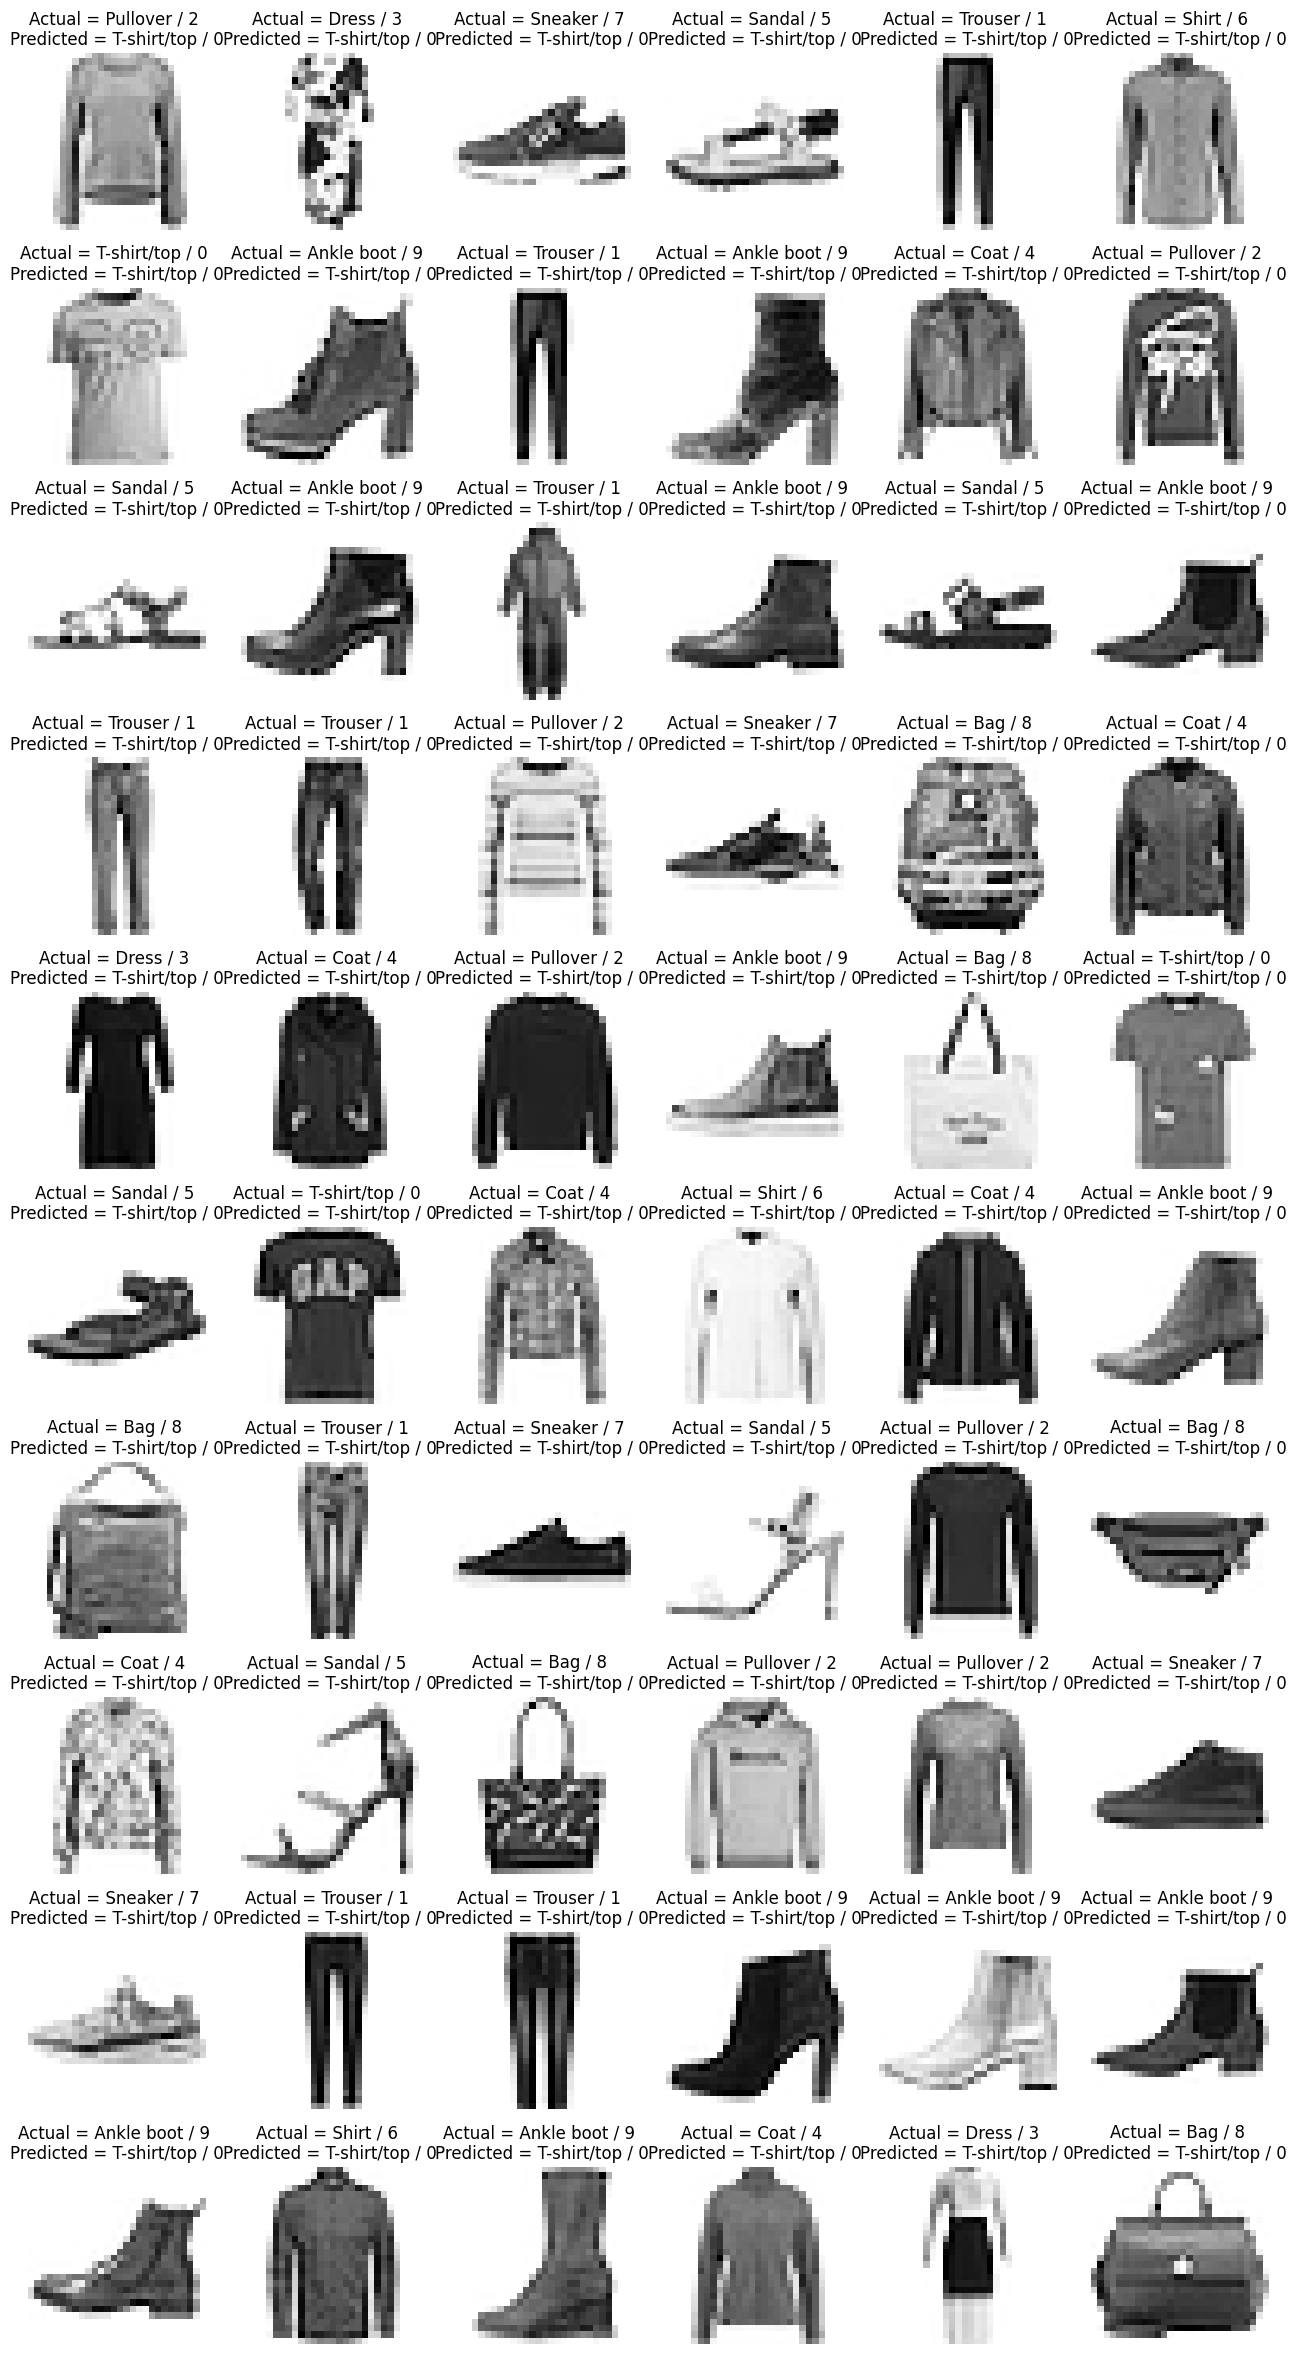

In [ ]:
# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize= (16,30))
j=1

for i in np.random.randint(0, 1000,60):
    plt.subplot(10,6, j)
    j+=1
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[int(y_test[i])], int(y_test[i]), class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')


In [ ]:
from sklearn.metrics import classification_report

# Convert one-hot encoded labels to class indices if needed
if y_test.ndim == 2 and y_test.shape[1] > 1:
    y_test_indices = np.argmax(y_test, axis=1)
else:
    y_test_indices = y_test  # If y_test is already in integer form

# Convert y_pred to class indices
y_pred_indices = np.argmax(y_pred, axis=1)

# Generate the classification report
cr = classification_report(y_test_indices, y_pred_indices, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.10      1.00      0.18      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.00      0.00      0.00      1000
       Dress       0.00      0.00      0.00      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.00      0.00      0.00      1000
       Shirt       0.00      0.00      0.00      1000
     Sneaker       0.00      0.00      0.00      1000
         Bag       0.00      0.00      0.00      1000
  Ankle boot       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Save Model
model.save('fashion_mnist_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Load Model

fashion_model = tf.keras.models.load_model('fashion_mnist_cnn_model.h5')
